In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflowjs as tfjs
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
# from IPython.display import SVG
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train / 255, axis=3)
x_test = np.expand_dims(x_test / 255, axis=3)
print(x_train[0].shape)

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


(28, 28, 1)


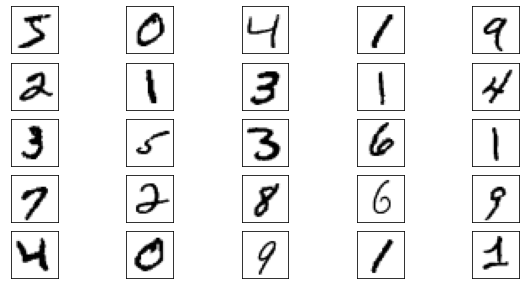

In [8]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [15]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax'),
])

model.summary()

plot_model(model)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

Count trains: 60000
Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1255 - accuracy: 0.9619 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 2/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0670 - accuracy: 0.9806 - val_loss: 0.0381 - val_accuracy: 0.9881
Epoch 3/5
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0493 - accuracy: 0.9856 - val_loss: 0.0389 - val_accuracy: 0.9889
Epoch 4/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 5/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0337 - val_accuracy: 0.9908


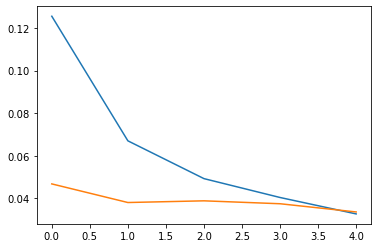

313/313 [==============================] - 2s 6ms/step - loss: 0.0264 - accuracy: 0.9914


In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
print(f'Count trains: {len(x_train)}')
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

model.evaluate(x_test, y_test_cat, batch_size=32)
tfjs.converters.save_keras_model(model, '.')


[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.08627450980392157], [0.16862745098039217], [0.16862745098039217], [0.0], [0.0], [0.0], [0.0

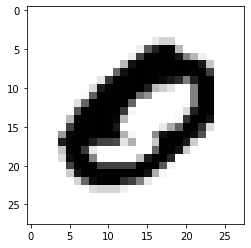

In [26]:
n = np.random.randint(0, len(y_test))
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'Number: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


(85, 28, 28, 1)
Network answer: 9


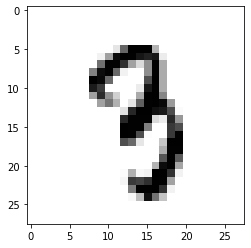

In [23]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
 
mask = pred == y_test

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

n = np.random.randint(0, len(x_false))
plt.imshow(x_false[n], cmap=plt.cm.binary)
print(f'Network answer: {p_false[n]}')
plt.show()